In [2]:
'''Perudo optimal bet calculation'''


import random as rd
import collections as c
import math

import sys
!{sys.executable} -m pip install numpy

import numpy as np

!{sys.executable} -m pip install tqdm
from tqdm import tqdm

!{sys.executable} -m pip install matplotlib
from matplotlib import pyplot as plt


In [11]:
class Player_Scores:

    def __init__(self, name, num_dice):
        self.num_dice = num_dice

    def player_dice(self):
        num_dice = self.num_dice
        player_vals = []
        for i in range (num_dice):
            dice = rd.randint(1,6)
            player_vals.append(dice)

        return player_vals

        #print(player_vals)
def count_ones(freqs):
    for freq in freqs:
        if freq[0] == 1:
            return freq[1]




def constrained_sum_sample_pos(n, total):
    """Return a randomly chosen list of n positive integers summing to total.
    Each such list is equally likely to occur.

    thanks to @MarkDickinson for providing this function

    """

    dividers = sorted(rd.sample(range(1, total), n - 1))
    return [a - b for a, b in zip(dividers + [total], [0] + dividers)]

def constrained_sum_sample_nonneg(n, total):
    """Return a randomly chosen list of n nonnegative integers summing to total.
    Each such list is equally likely to occur."""

    return [x - 1 for x in constrained_sum_sample_pos(n, total + n)]


def run_sim(total_dice):

    split_dice = constrained_sum_sample_nonneg(6, total_dice)



    Person1 = Player_Scores('Lexi', split_dice[0])
    Person2 = Player_Scores('AJ', split_dice[1])
    Person3 = Player_Scores('Daisy', split_dice[2])
    Person4 = Player_Scores('Margot', split_dice[3])
    Person5 = Player_Scores('Kush', split_dice[4])
    Person6 = Player_Scores('Flo', split_dice[5])

    Players = [Person1, Person2, Person3, Person4, Person5, Person6]

    all_dice =[]


    for player in Players:

        vals = player.player_dice()
        all_dice = all_dice + vals





    counter = c.Counter(all_dice)
    freqs = counter.most_common()

    total = 0
    first = freqs[0]

    if first[0] != 1:

        try:
            total = first[1]
            ones = count_ones(freqs)
            total = total + ones
        except TypeError:
            total = np.NaN
    else:
        total = count_ones(freqs)

    return total, total_dice

def simulateRolls(iterations, total_dice):

    totals = []
    for i in tqdm(range(iterations)):
        total, tot_dice = run_sim(total_dice)
        totals.append(total)

    totals_arr = np.array(totals)
    average = np.nanmean(totals_arr)

    return total_dice, average


averages = []
no_dice = []

for i in range(30):

    try:

        total_dice, average = simulateRolls(1000000, i)
        no_dice.append(total_dice)
        averages.append(average)

    except Exception:

        no_dice.append(0)
        averages.append(0)






100%|█████████████████| 1000000/1000000 [00:22<00:00, 44385.27it/s]


In [12]:
prop = [int(a) / int(n) if n else 0 for a, n in zip(averages, no_dice)]
    
prop

[0,
 1.0,
 0.5,
 0.3333333333333333,
 0.5,
 0.4,
 0.5,
 0.42857142857142855,
 0.375,
 0.4444444444444444,
 0.4,
 0.45454545454545453,
 0.4166666666666667,
 0.38461538461538464,
 0.42857142857142855,
 0.4,
 0.375,
 0.4117647058823529,
 0.3888888888888889,
 0.3684210526315789,
 0.4,
 0.38095238095238093,
 0.36363636363636365,
 0.391304347826087,
 0.375,
 0.36,
 0.38461538461538464,
 0.37037037037037035,
 0.35714285714285715,
 0.3793103448275862]

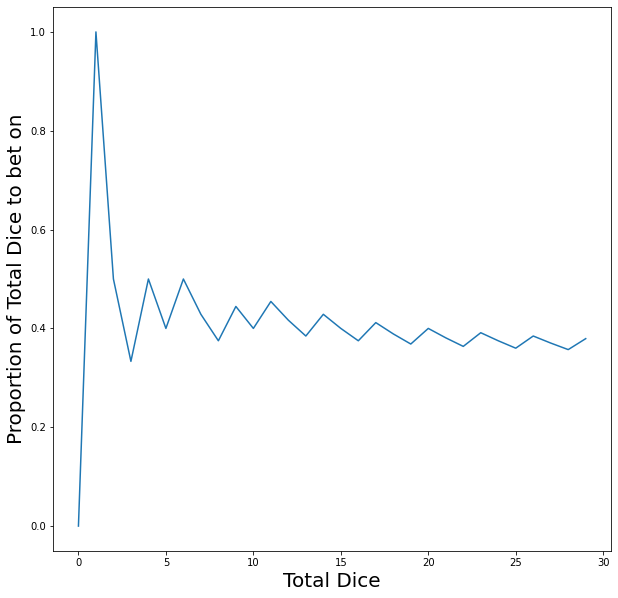

In [13]:
'''Plotting'''



fig, ax = plt.subplots(figsize = (10,10))
plt.plot(no_dice, prop)
plt.xlabel('Total Dice', fontsize = 20)
plt.ylabel('Proportion of Total Dice to bet on', fontsize = 20)
plt.show()